In [13]:
!pip install scikit-learn

     ---------------------------------------- 8.2/8.2 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.5 MB/s eta 0:00:00


In [15]:
!pip install pandas

     -------------------------------------- 10.4/10.4 MB 413.2 kB/s eta 0:00:00
     ------------------------------------ 499.4/499.4 kB 497.1 kB/s eta 0:00:00


In [29]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values #data frame #: ya3ni ts les elements #opening sf 1:2 drna 1:2 bach urjea array et non pas vector
#Transform features by scaling each feature to a given range.
sc = MinMaxScaler(feature_range=(0,1)) #normaliser pr ne pas avoir de grandes valeurs #minmaxscaler mets en echelle interval bin 0 et 1 
training_set_scaled = sc.fit_transform(training_set) #appliquer hadik transformation ela l values 
print(training_set_scaled)
print(training_set_scaled.shape) #2035 lignes 1 colonne 
#les entrees de mon reseau de neurone 
	#input tableau de 3 dimensiions (batch,)#batch shhal mn ligne 1975 / nbr seque 60 / feature 1
X_train = []
y_train = []


for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0]) #raybda b 60 60-60 = 0 à 60 apres mn 1975 tal 2035
    y_train.append(training_set_scaled[i, 0]) #raycomparer mea les res li aslan endna
X_train, y_train = np.array(X_train), np.array(y_train)# khas tableau numpy
#1975 observation / tahuwa mn 60 l 2034 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #0 f lowla huwa 1975 u tani nbr de colonne huwa 60  #feature wahd dakshi elash
model = Sequential()

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]
(2035, 1)


In [31]:

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
# couche LSTM  unit hiya nbr de neurone 50 , true hit mzl endna LSTM mn bead , 60 , 1 feature , batch huwa kiearfu buhdu 
model.add(Dropout(0.2)) #exp wakha 99 accuracy - khas tshuf data jdida bach nearf wash dik accuracy mzyana 
#khas model iearf f nvlle data 
#over fitting : tqra bzffff bonne accuracy f data d apprentissage ms f de test mfeddiiii  
#drop out ray7yd des neurones aleatoirement 
#iil va s entrainer bla duk neurones aytealm ljadid ==> kanhyd lih les fortes correlations 
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2)) # 20%

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #dima output / une seule val de sortie dyal nhal li mora # dik 1 zeama il va predire 1 hiya opening 

model.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
model.fit(X_train,y_train,epochs=50,batch_size=32) #ytrain hiya labels 

Epoch 1/50
62/62 [==============================] - 11s 181ms/step - loss: 0.0025
Epoch 2/50
62/62 [==============================] - 12s 200ms/step - loss: 0.0022
Epoch 3/50
62/62 [==============================] - 13s 202ms/step - loss: 0.0023
Epoch 4/50
62/62 [==============================] - 11s 180ms/step - loss: 0.0023
Epoch 5/50
62/62 [==============================] - 11s 181ms/step - loss: 0.0019
Epoch 6/50
62/62 [==============================] - 12s 186ms/step - loss: 0.0020
Epoch 7/50
62/62 [==============================] - 11s 186ms/step - loss: 0.0016
Epoch 8/50
62/62 [==============================] - 11s 178ms/step - loss: 0.0019
Epoch 9/50
62/62 [==============================] - 11s 178ms/step - loss: 0.0016
Epoch 10/50
62/62 [==============================] - 12s 186ms/step - loss: 0.0016
Epoch 11/50
62/62 [==============================] - 11s 177ms/step - loss: 0.0017
Epoch 12/50
62/62 [==============================] - 11s 178ms/step - loss: 0.0017
Epoch 13/50
6

In [27]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #ranhtaj 60 jrs avant dakshi elash drna combinaison 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)#unkknown dimension hiya -1
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0]) # 0 wla bd test - 60
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)

C:\Users\Imane\AppData\Local\Temp\ipykernel_17804\4094905049.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


1/1 [==============================] - 0s 269ms/step


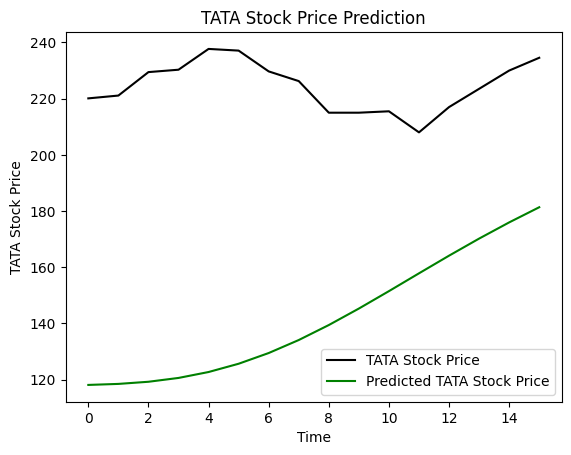

In [21]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()